# Big Data Mart Sales Prediction

#### Problem Statement

BigMart has collected sales data for 1559 products across 10 stores in different cities. Attributes of each product and store have been defined. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


train = pd.read_csv("./bigdatamart_Train.csv")
test = pd.read_csv("./bigdatamart_Test.csv")

In [2]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
train.shape

(8523, 12)

In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [8]:
train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

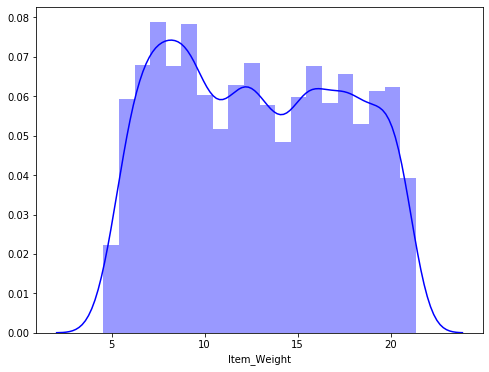

In [9]:
plt.figure(figsize=(8,6))
sns.distplot(train['Item_Weight'].dropna(),color='blue')

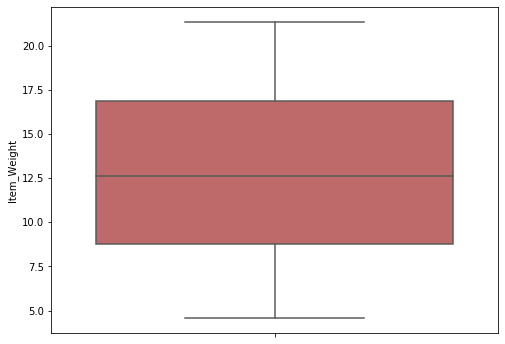

In [10]:
fig1=plt.figure(figsize=(8,6))
sns.boxplot(train['Item_Weight'],orient='v',color='indianred')

In [11]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
train['Item_Fat_Content'].describe()

count        8523
unique          5
top       Low Fat
freq         5089
Name: Item_Fat_Content, dtype: object

In [13]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('low fat','Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('LF','Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg','Regular')
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

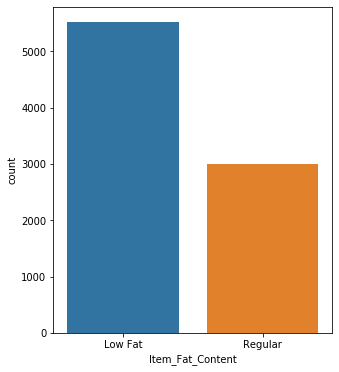

In [14]:
plt.figure(figsize = (5,6))

sns.countplot(train.Item_Fat_Content)


In [15]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

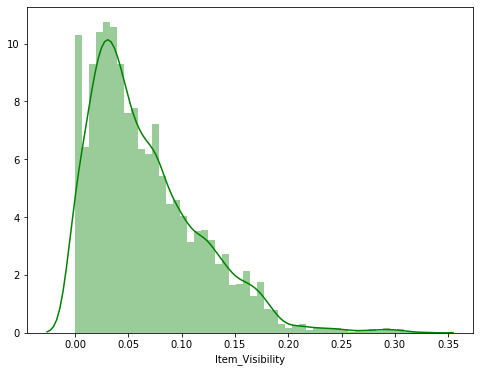

In [16]:
plt.figure(figsize=(8,6))
sns.distplot(train['Item_Visibility'].dropna(),color='green')

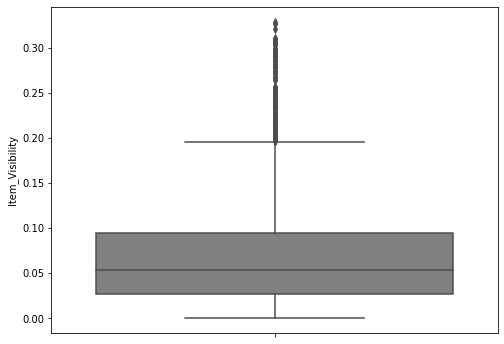

In [17]:
fig1=plt.figure(figsize=(8,6))
sns.boxplot(train['Item_Visibility'],orient='v',color='gray')

In [18]:
train[train['Item_Visibility']>0.2].shape[0]

134

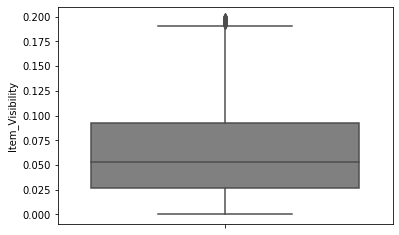

In [19]:
train = train[train['Item_Visibility']<0.2]
sns.boxplot(train['Item_Visibility'], orient='v', color='gray')

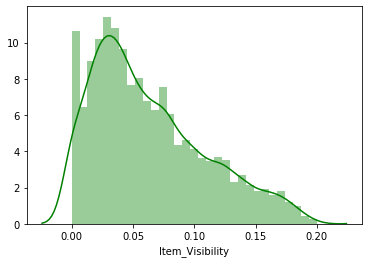

In [20]:
sns.distplot(train['Item_Visibility'].dropna(),color='green')

In [21]:
train['Item_Type'].describe()

count                      8389
unique                       16
top       Fruits and Vegetables
freq                       1209
Name: Item_Type, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

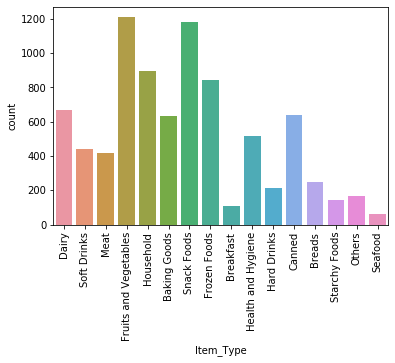

In [22]:
sns.countplot(train['Item_Type'])
plt.xticks(rotation=90)

In [23]:
train['Item_MRP']

0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8389, dtype: float64

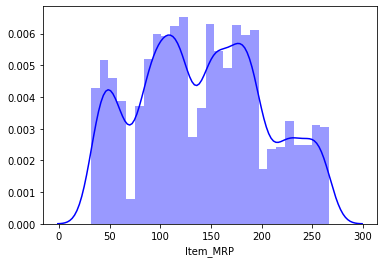

In [24]:
sns.distplot((train['Item_MRP']), color='blue')

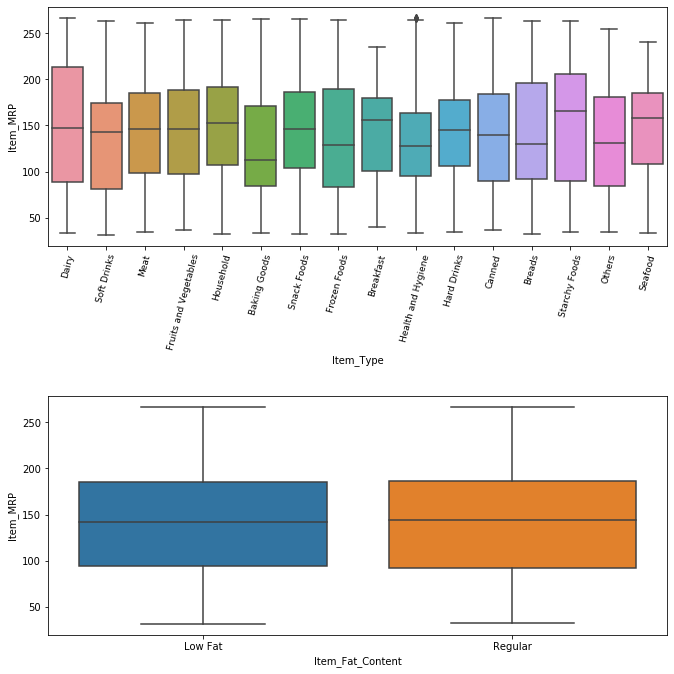

In [25]:
labels=train['Item_Type'].unique()
fig6=plt.figure(figsize=(10,10))
ax1=fig6.add_subplot(211)
sns.boxplot(x='Item_Type',y='Item_MRP',data=train,ax=ax1)
ax1.set_xticklabels(labels, rotation=75,size=9)

ax2=fig6.add_subplot(212)
sns.boxplot(x='Item_Fat_Content',y='Item_MRP',data=train,ax=ax2)

fig6.tight_layout(pad=3) #For spacing between subplots

In [26]:
train['Count'] = 1
df_outlets = train.groupby('Outlet_Identifier')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)

([<matplotlib.axis.YTick at 0x1a595e6f4c8>,
 <a list of 11 Text yticklabel objects>)

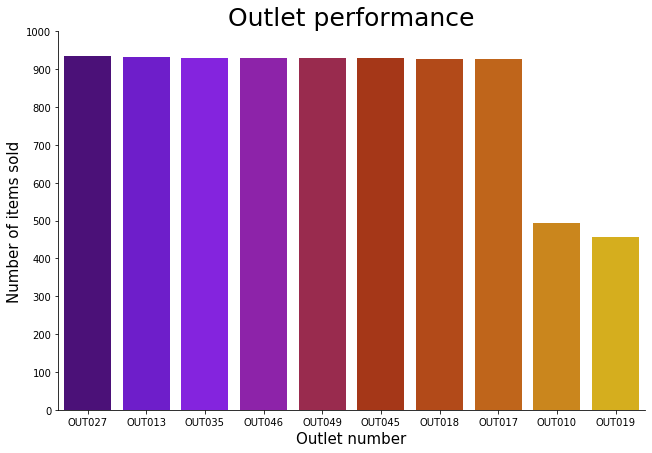

In [27]:
sns.catplot('Outlet_Identifier','Count',data=df_outlets,aspect=1.5,height=6,kind='bar',palette='gnuplot')
plt.xticks(size=10)
plt.ylabel('Number of items sold',size=15)
plt.xlabel('Outlet number',size=15)
plt.title('Outlet performance',size=25)
plt.yticks(np.arange(0,1100,100))

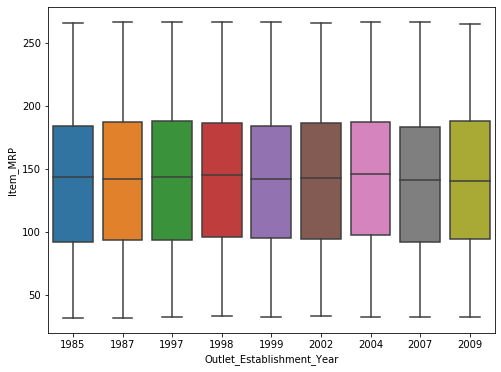

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot('Outlet_Establishment_Year','Item_MRP',data=train)

In [29]:
train['Outlet_Establishment_Year'].describe()

count    8389.000000
mean     1997.940756
std         8.353477
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

Text(0.5, 1.0, 'Outlet sales')

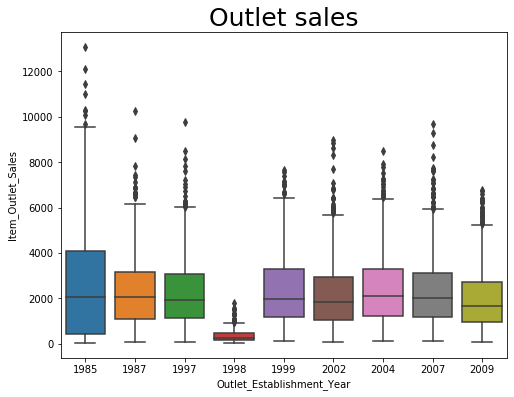

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot('Outlet_Establishment_Year','Item_Outlet_Sales',data=train)
plt.title('Outlet sales',size=25)

In [31]:
train['Outlet_Size'].isna().value_counts()

False    6041
True     2348
Name: Outlet_Size, dtype: int64

About 2348 instances have null values which is quite a sizeable amount.

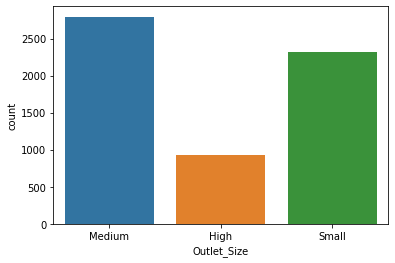

In [32]:
sns.countplot(train['Outlet_Size'])
#plt.xticks(rotation=45)

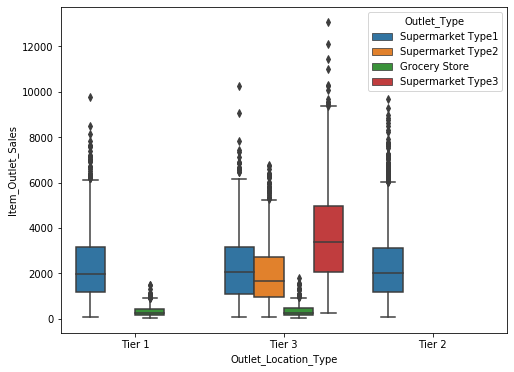

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(y='Item_Outlet_Sales',hue='Outlet_Type',x='Outlet_Location_Type',data=train)

As we can see, tier 3 locations seem to be selling better than both tier 2 and tier 1. It is also to be noted that tier 3 has more number of stores in it. Hence, the sales are better too.

In [34]:
train.drop('Count',axis=1,inplace=True)

In [35]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


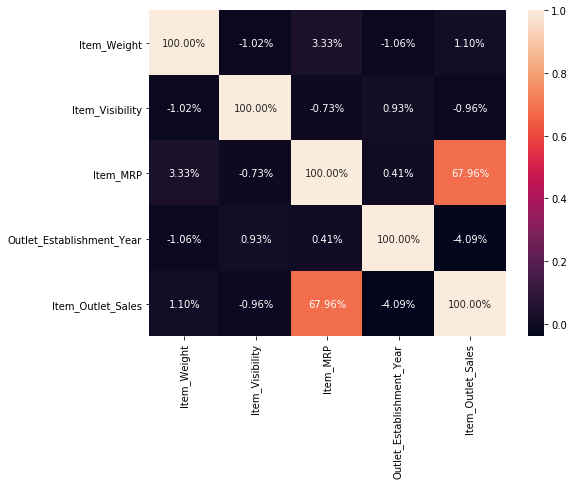

In [36]:
corr = train.dropna().corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True, fmt='.2%')

From the above, we can see that correlation of Item_Weight is extremely low. Hence, we can simply drop this column and get done with the issues of null values. We shall similarly remove the order_size as there is no way to deal with the null values here aswell. We would also get rid of the item_identifier and outlet_indetifier since it is of no consequence to us.

In [37]:
unused_columns=['Item_Weight','Outlet_Size','Item_Identifier','Outlet_Identifier']

for cols in unused_columns:
    train.drop(cols,axis=1,inplace=True)

In [38]:
train

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,1999,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,2009,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,1999,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...
8518,Low Fat,0.056783,Snack Foods,214.5218,1987,Tier 3,Supermarket Type1,2778.3834
8519,Regular,0.046982,Baking Goods,108.1570,2002,Tier 2,Supermarket Type1,549.2850
8520,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Tier 2,Supermarket Type1,1193.1136
8521,Regular,0.145221,Snack Foods,103.1332,2009,Tier 3,Supermarket Type2,1845.5976


Now we need to handle catagorical data either by using label encoder or one-hot encoding

In [39]:
df_dummie = pd.get_dummies(train['Item_Type'])

In [40]:
train = train.merge(df_dummie, on=train.index)

In [41]:
train.drop('key_0',axis=1,inplace=True)
train.drop('Item_Type',axis=1,inplace=True)

In [42]:
train['Outlet_Location_Type'].replace('Tier 1',1,inplace=True)
train['Outlet_Location_Type'].replace('Tier 2',2,inplace=True)
train['Outlet_Location_Type'].replace('Tier 3',3,inplace=True)

In [43]:
dummies_outlet = pd.get_dummies(train['Outlet_Type'])
train = train.merge(dummies_outlet,on=train.index)
train.drop('key_0',axis=1,inplace=True)
train.drop('Outlet_Type',axis=1,inplace=True)

In [44]:
target = train['Item_Outlet_Sales']
train.drop('Item_Outlet_Sales',axis=1,inplace=True)
train.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,Low Fat,0.016047,249.8092,1999,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,Regular,0.019278,48.2692,2009,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,Low Fat,0.016760,141.6180,1999,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,Regular,0.000000,182.0950,1998,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Low Fat,0.000000,53.8614,1987,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
train['Item_Fat_Content'].replace('Low Fat',1,inplace=True)
train['Item_Fat_Content'].replace('Regular',0,inplace=True)

In [46]:
train.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0.016047,249.8092,1999,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0.019278,48.2692,2009,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0.016760,141.6180,1999,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0.000000,182.0950,1998,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0.000000,53.8614,1987,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Above dataframe is ready for ML now.

We will now train our model by applying various ML algorithms and select the model which gives best accuracy.

In [47]:
train

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0.016047,249.8092,1999,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0.019278,48.2692,2009,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0.016760,141.6180,1999,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0.000000,182.0950,1998,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0.000000,53.8614,1987,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,1,0.056783,214.5218,1987,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8385,0,0.046982,108.1570,2002,2,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8386,1,0.035186,85.1224,2004,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8387,0,0.145221,103.1332,2009,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Training Phase

In [48]:
X_train,X_test,y_train,y_test = train_test_split(train,target,shuffle=True,test_size=0.2,random_state=0)

### 1. Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
LR.score(X_train,y_train)

0.5620345988855906

In [52]:
y_pred_LR = LR.predict(X_test)

In [53]:
rmse_lr = np.sqrt(mean_squared_error(y_pred_LR,y_test))
print('RMSE for Linear Regression:{0:.2f}'.format(rmse_lr))

RMSE for Linear Regression:1130.81


In [54]:
df_lr = pd.DataFrame()
df_lr['Target'] = y_test
df_lr['Prediction'] = y_pred_LR

Text(0.5, 1, 'Linear Regression')

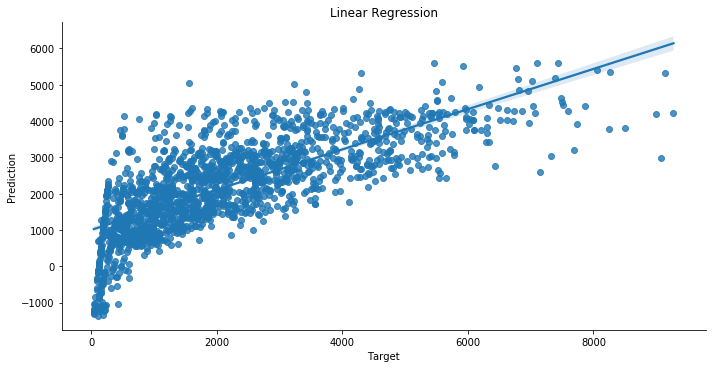

In [55]:
sns.lmplot('Target','Prediction', data = df_lr, aspect = 2)
plt.title('Linear Regression')

### 2. Ridge Regression

In [56]:
from sklearn.linear_model import RidgeCV
rr = RidgeCV(cv = 10)
rr.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [57]:
rr.score(X_train,y_train)

0.5619667255114942

In [58]:
y_preds_rr = rr.predict(X_test)
rmse_rr = np.sqrt(mean_squared_error(y_preds_rr,y_test))
print('RMSE for Ridge Regression:{0:.2f}'.format(rmse_rr))

RMSE for Ridge Regression:1130.70


In [59]:
df_rr = pd.DataFrame()
df_rr['Target'] = y_test
df_rr['Prediction'] = y_preds_rr

Text(0.5, 1, 'Ridge Regression')

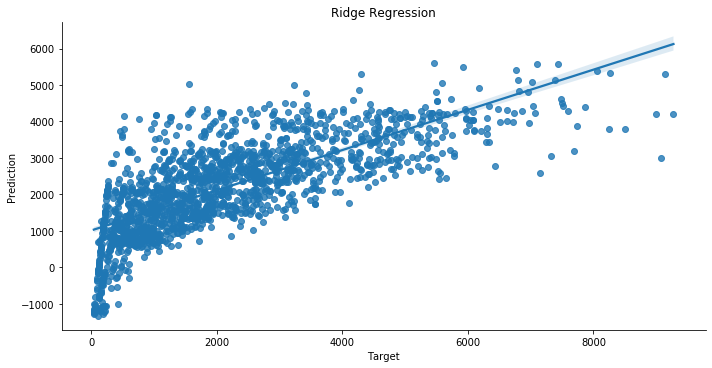

In [60]:
sns.lmplot('Target','Prediction', data = df_rr, aspect = 2)
plt.title('Ridge Regression')

### 3. Random Forest Regression :

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [62]:
rf = RandomForestRegressor(random_state=0)
para_grid = {'n_estimators':[3,4,5,7,9,10,12], 'max_depth':[5,7,9,10,12]}
grid = GridSearchCV(rf,para_grid,scoring='r2',cv=10)

In [64]:
grid_result = grid.fit(X_train,y_train)
grid_result.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [65]:
grid_result.score(X_train,y_train)

0.6037626015518893

In [66]:
y_preds_rf = grid_result.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_preds_rf,y_test))
print('RMSE for Random Forest Regression:{0:.2f}'.format(rmse_rf))

RMSE for Random Forest Regression:1077.74


In [67]:
df_rf = pd.DataFrame()
df_rf['Target'] = y_test
df_rf['Prediction'] = y_preds_rf

Text(0.5, 1, 'Random Forest Regression')

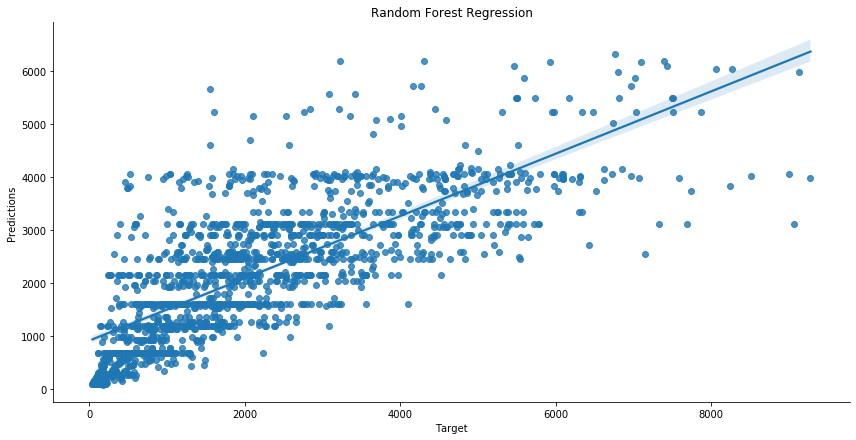

In [70]:
rf_df = pd.DataFrame()
rf_df['Target'] = y_test
rf_df['Predictions'] = y_preds_rf

sns.lmplot('Target','Predictions',data=rf_df,height=6,aspect=2)
plt.title('Random Forest Regression')

## Testing Phase

Now that we have trained a few models, it is time for us to apply them to the test dataframe. For this, we need to align the dataframe exactly as the train dataframe.

In [71]:
df_ID = pd.DataFrame(test['Item_Identifier'])
df_ID['Outlet_Identifier'] = test['Outlet_Identifier']

In [73]:
unn_col=['Item_Weight','Outlet_Size','Item_Identifier','Outlet_Identifier']

for cols in unn_cols:
    test.drop(cols,axis=1,inplace=True)

In [74]:
test.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,Low Fat,0.007565,Snack Foods,107.8622,1999,Tier 1,Supermarket Type1
1,reg,0.038428,Dairy,87.3198,2007,Tier 2,Supermarket Type1
2,Low Fat,0.099575,Others,241.7538,1998,Tier 3,Grocery Store
3,Low Fat,0.015388,Snack Foods,155.0340,2007,Tier 2,Supermarket Type1
4,Regular,0.118599,Dairy,234.2300,1985,Tier 3,Supermarket Type3


In [75]:
train.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0.016047,249.8092,1999,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0.019278,48.2692,2009,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0.016760,141.6180,1999,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0.000000,182.0950,1998,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0.000000,53.8614,1987,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [76]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('low fat','Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('LF','Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg','Regular')


In [77]:
test['Item_Fat_Content'].replace('Low Fat',1,inplace=True)
test['Item_Fat_Content'].replace('Regular',0,inplace=True)

In [78]:
df_dummies_type = pd.get_dummies(test['Item_Type'])
test = test.merge(df_dummies_type,on=test.index)

In [79]:
test.drop('key_0',axis=1,inplace=True)
test.drop('Item_Type',axis=1,inplace=True)                   
                    

In [80]:
test['Outlet_Location_Type'].replace('Tier 1',1,inplace=True)
test['Outlet_Location_Type'].replace('Tier 2',2,inplace=True)
test['Outlet_Location_Type'].replace('Tier 3',3,inplace=True)

In [81]:
df_dummies_outlet=pd.get_dummies(test['Outlet_Type'])
test = test.merge(df_dummies_outlet,on=test.index)

In [82]:
test.drop('key_0',axis=1,inplace=True)
test.drop('Outlet_Type',axis=1,inplace=True)                   
                    

We will use Random Forest Regrssor as it performs better than other models

In [83]:
y_preds_rf = grid_result.predict(test)
df_model = df_ID
df_model['Item_Outlet_Sales'] = y_preds_rf
df_model.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1609.017103
1,FDW14,OUT017,1263.040194
2,NCN55,OUT010,583.257242
3,FDQ58,OUT017,2446.288967
4,FDY38,OUT027,5969.300166


In [85]:
import joblib
joblib.dump(rf,'rf_BigDataMart.pkl')


['rf_BigDataMart.pkl']